In [33]:
# Linear regression model to predict life satisfaction of a country, based on its GDP.

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [7]:
# Load Life Satisfaction Data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=",")
oecd_bli.index = oecd_bli['Country']

# Load GDP Data
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=",", delimiter='\t', encoding="latin1", na_values="n/a")
gdp_per_capita.index = gdp_per_capita["Country"]

In [34]:
# Prep Data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per Capita (USD)']]
y = np.c_[country_stats['Life Satisfaction']]
country_stats.head()

,GDP per Capita (USD),Life Satisfaction
Country,,
Australia,50962.0,7.3
Austria,43724.0,6.9
Belgium,40107.0,6.9
Brazil,8670.0,7.0
Canada,43332.0,7.3


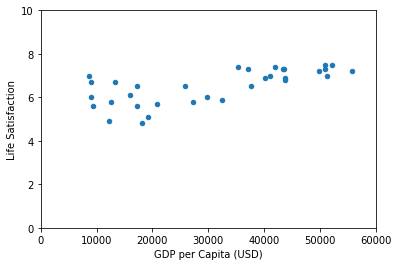

In [35]:
# Visualise data
country_stats.plot(kind='scatter', x="GDP per Capita (USD)", y="Life Satisfaction", xlim=[0, 60000], ylim=[0, 10])
plt.show()

In [27]:
# Set and train model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
# Make Prediction
X_new = [[22587]] # gdp of a new country
print(model.predict(X_new)) # prints prediction of life statisfaction

[[6.28653576]]


In [31]:
# Select appropriate data from OECD and GDP tables and combine into a single dataframe
def prepare_country_stats(oecd_bli, gdp_per_capita):
    req1 = oecd_bli['Indicator']=='Life satisfaction'
    req2 = oecd_bli['INEQUALITY']=='TOT'
    oecd = pd.DataFrame({'Life Satisfaction':oecd_bli[req1 & req2]['Value']})
    gdp = pd.DataFrame({'GDP per Capita (USD)':gdp_per_capita['2015']}).round(0)
    return pd.merge(gdp, oecd, on='Country')

In [32]:
#Notes
#pd.merge() (merge tables) merge on='Country' merges the tables on the common index 'Country' and discards any rows which aren't contained in both tables
#re1/re2 Choose multiple conditions when using boolean selections by creating 'requirements' ... boolean expressions which can be used to specificy rows/columns of data
#np.c_ = takes all the data from the specified column and builds up a 2d array with just that data
#model predicts slightly different values than in the book...? 